# Required packages

In [1]:
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
import string
import fasttext
import numpy as np
from scipy import stats
import os
import math
from process import *
from custom_models import *

# Process the row corpus
- normalised the corpus
- remove punctuations

In [2]:
lang = 'mr'
input_path = '/data1/hcs207019/data/mr/mr.txt'
output_path = '/data1/hcs207019/data/mr/processed/mr.norm_punc_remv.txt'

# Normalize_data(input_path, output_path, lang)

## Print the raw corpus
only first 50 line 

In [3]:
input_path = '/data1/hcs207019/data/mr/mr.txt'
print_n_lines_from_file(input_path, 50)

स्वप्न दाखविणे आणि आश्वासने देणारे नेतेही लोकांना खूप आवडतात.

मुलांसोबतच पालकांना सांभाळण्याची जबाबदारी ही विवाहीत महिलांचीही आहे. . . केवळ, विवाह झालाय म्हणून वृद्ध पालकांची जबाबदारी त्यांना झटकता येणार नाही असं हायकोर्टानं म्हटलंय.

पहा काय बरळला पाकड्यांचा पंतप्रधान इमरान खान

३ (पीसीबी) – मावळमध्ये पवना जलवाहिनीविरोधात आंदोलन करणाऱ्या आंदोलक शेतकऱ्यांवर गोळीबार करण्याचे आदेश मी दिल्याचा पंतप्रधान नरेंद्र मोदींचा आरोप चुकीचा आहे.

वृषभ : क्षुल्लक कारणाने तुम्ही अस्वस्थ व्हाल.

तो किती बद्दल, आम्ही नंतर तुम्हांला सांगतो.

मुख्य पान चालू घडामोडी शेतकऱयांना कर्जमाफी किंवा भरपाई

मुलांमध्ये भेदभाव पालकांनी करू नये, मिठाई आणली असेल तर सर्वाना द्यावी, फक्त एकाच मुलाला/मुलीला आणि इतरांना नाही असे नको.

राज्यातलं सरकार आणि मुख्यमंत्री चांगलं काम करत आहेत.

चित्रपटातील गाणं रिमेक जरी असलं तरी त्यात बॉलिवूड स्टाईल वापरली असल्याने प्रेक्षकांना ते फार आवडत आहे.

शुक्रवारी सायंकाळी चव्हाट गल्ल्ली येथे हि घटना घडली असून जखमी युवकाला उपचारासाठी सिव्हिल हॉस्पिटलमध्ये दाखल करण्यात आले . . . Full Ar

## Print processed corpus
only first 50 lines

In [4]:
output_path = '/data1/hcs207019/data/mr/processed/mr.norm_punc_remv.txt'
print_n_lines_from_file(output_path, 50)

स्वप्न दाखविणे आणि आश्वासने देणारे नेतेही लोकांना खूप आवडतात

मुलांसोबतच पालकांना सांभाळण्याची जबाबदारी ही विवाहीत महिलांचीही आहे   केवळ विवाह झालाय म्हणून वृद्ध पालकांची जबाबदारी त्यांना झटकता येणार नाही असं हायकोर्टानं म्हटलंय

पहा काय बरळला पाकड्यांचा पंतप्रधान इमरान खान

३ पीसीबी  मावळमध्ये पवना जलवाहिनीविरोधात आंदोलन करणाऱ्या आंदोलक शेतकऱ्यांवर गोळीबार करण्याचे आदेश मी दिल्याचा पंतप्रधान नरेंद्र मोदींचा आरोप चुकीचा आहे

वृषभ  क्षुल्लक कारणाने तुम्ही अस्वस्थ व्हाल

तो किती बद्दल आम्ही नंतर तुम्हांला सांगतो

मुख्य पान चालू घडामोडी शेतकऱयांना कर्जमाफी किंवा भरपाई

मुलांमध्ये भेदभाव पालकांनी करू नये मिठाई आणली असेल तर सर्वाना द्यावी फक्त एकाच मुलालामुलीला आणि इतरांना नाही असे नको

राज्यातलं सरकार आणि मुख्यमंत्री चांगलं काम करत आहेत

चित्रपटातील गाणं रिमेक जरी असलं तरी त्यात बॉलिवूड स्टाईल वापरली असल्याने प्रेक्षकांना ते फार आवडत आहे

शुक्रवारी सायंकाळी चव्हाट गल्ल्ली येथे हि घटना घडली असून जखमी युवकाला उपचारासाठी सिव्हिल हॉस्पिटलमध्ये दाखल करण्यात आले    Full Article

मात्र मटक्यात

# Train 'n' FastText Models
- n = 10
- 10 fasttext models are trained for 2 epochs

In [5]:
n = 10
# train_n_models(n)

## Pretrained model from indicNLP for Marathi
- dim = 300

In [6]:
model_1 = fasttext.load_model('/data1/hcs207019/data/mr/models/indicnlp.ft.mr.300.bin')

## Correlation score for pretrained model

In [8]:
data_path ='/data1/hcs207019/data/mr/processed/proc_Marathi-WS.txt'
model = model_1
dataset, corr, oov = compute_similarity(data_path, model)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))
print("\n")

proc_Marathi-WS.txt : 51  (OOV:  0%)




# Process the word Similarity dataset
- keep only those word pairs that have similarity score available
- before processing, size = 253
- after processing, size = 104

In [9]:
input_path = '/data1/hcs207019/data/mr/Marathi-WS.txt'
output_path = '/data1/hcs207019/data/mr/processed/proc_Marathi-WS.txt'
# proc_wordSim_dataset(input_path, output_path)

### print the word Similarity dataset

In [10]:
file_path = '/data1/hcs207019/data/mr/processed/proc_Marathi-WS.txt'
with open(file_path, 'r', encoding='utf-8') as in_fp:
    print(in_fp.read())

वाघ	मांजर	7
वाघ	वाघ	10
पुस्तक	कागद	7.375
संगणक	कळफलक	8
संगणक	इंटरनेट	8.5
विमान	कार	6.75
रेल्वे	कार	6.625
टेलिफोन	संवाद	9
दूरदर्शन	रेडिओ	7
मीडिया	रेडिओ	8
भाकरी	लोणी	6.375
काकडी	बटाटा	7
डॉक्टर	परिचारिका	6.375
प्राध्यापक	डॉक्टर	4
विद्यार्थी	प्राध्यापक	6
स्मार्ट	विद्यार्थी	4.375
स्मार्ट	मूर्ख	3
कस	अंडी	7
पुस्तक	ग्रंथालय	6.375
बँक	पैसा	8.5
लाकूड	वन	6
पैसा	रोख	9.375
प्राध्यापक	काकडी	0
राजा	कोबी	0
राजा	राणी	7.375
पवित्र	सेक्स	2.375
टेनिस	रॅकेट	6.375
यासिर	शांतता	6
अराफात	दहशतवादी	8.375
अराफात	जॅक्सन	0
कायदा	वकील	8.5
चित्रपट	स्टार	8
चित्रपट	पॉपकॉर्न	8
चित्रपट	समीक्षक	8.5
चित्रपट	थिएटर	8.625
भौतिकशास्त्र	प्रोटॉन	8
रसायनशास्त्र	भौतिकशास्त्र	7
दारू	रसायनशास्त्र	2
पेय	गाडी	1
पेय	कान	0
पेय	तोंड	5.5
बाळ	आई	7
पेय	आई	0
रत्न	रत्नजडित	9.375
भट्टी	शेगडी	7.375
अन्न	फळे	7
पक्षी	कोंबडा	6
पक्षी	क्रेन	6.5
भाऊ	साधू	4.5
प्रवास	कार	5
अन्न	कोंबडा	4
वन	स्मशानभूमी	3
साधू	गुलाम	2
काच	जादूगार	4
पैसा	चलन	9.5
पैसा	संपत्ती	9
पैसा	संपत्ती	9
पैसा	बँक	8.375
पैसा	ठेव	8
पैसा	ऑपरेशन	6
वाघ	प्राणी	6
वाघ	प्राणीसंग्रहालय	5
मानसशा

# Find correlation score for 'n' models
- first load the stored models
- then find the correlation score for each model

In [11]:
models = find_similarity_for_n_models(10)

proc_Marathi-WS.txt : 53  (OOV:  0%)


proc_Marathi-WS.txt : 53  (OOV:  0%)




proc_Marathi-WS.txt : 54  (OOV:  0%)


proc_Marathi-WS.txt : 53  (OOV:  0%)


proc_Marathi-WS.txt : 54  (OOV:  0%)




proc_Marathi-WS.txt : 54  (OOV:  0%)


proc_Marathi-WS.txt : 54  (OOV:  0%)




proc_Marathi-WS.txt : 54  (OOV:  0%)


proc_Marathi-WS.txt : 54  (OOV:  0%)




proc_Marathi-WS.txt : 54  (OOV:  0%)




# words in Vocab
- vocab size = 1161117

In [12]:
words = models[0].words
words

['</s>',
 'आहे',
 'आणि',
 'या',
 'नाही',
 'एक',
 'आहेत',
 'हे',
 'तर',
 'यांनी',
 'ते',
 'व',
 'होते',
 'केली',
 'हा',
 'पण',
 'ही',
 'काही',
 'केले',
 'असे',
 'करण्यात',
 'तो',
 'की',
 'केला',
 'होती',
 'त्यामुळे',
 'होता',
 'म्हणून',
 'मात्र',
 'आले',
 'आपण',
 'मध्ये',
 'आता',
 'असून',
 'त्या',
 'करून',
 'किंवा',
 'सर्व',
 'अनेक',
 'त्यांनी',
 'आली',
 'झाले',
 'आपल्या',
 'झाली',
 'मी',
 'सुरू',
 'अशी',
 'झाला',
 'दोन',
 'एका',
 'तसेच',
 'यांच्या',
 'त्यांना',
 'काम',
 'अशा',
 'काय',
 'आला',
 'असा',
 'त्यांच्या',
 'करण्यासाठी',
 'माहिती',
 'करत',
 'ती',
 'होत',
 'येथे',
 'दिली',
 'म्हणजे',
 'आज',
 'आवश्यक',
 'कमी',
 'का',
 'न',
 'मुंबई',
 'तरी',
 'त्याच्या',
 'असलेल्या',
 'जात',
 'करणे',
 'यांना',
 'असेल',
 'तयार',
 'हजार',
 'करू',
 'येथील',
 'अधिक',
 'होणार',
 'फक्त',
 'आम्ही',
 'मला',
 'असल्याचे',
 'सांगितले',
 'येत',
 'त्याला',
 'कारण',
 'प्रयत्न',
 'पाणी',
 'विविध',
 'जे',
 'असं',
 'दिले',
 'निर्णय',
 'असते',
 'इतर',
 'दरम्यान',
 'जाते',
 'पुन्हा',
 'तीन',
 'दाखल',
 'देखील',
 'दिल

In [13]:
len(models[0].words)

1161117

# Few word embeddings
- word embeeding from different models for word 'राम'

In [14]:
models[0].get_word_vector('राम')

array([-0.5090244 ,  0.23471063, -0.32036358,  0.24665762,  0.20399493,
        0.1757483 , -0.6251847 ,  0.02543087,  0.01510613, -0.40600765,
        0.06563352,  0.05253749,  0.00930885, -0.07297175, -0.30729166,
        0.7666208 ,  0.28297576,  0.6194502 , -0.9014857 , -0.0296521 ,
       -0.41477567, -0.01587935,  0.07750066, -0.35550344,  0.42628086,
       -0.6270954 , -0.703354  , -0.5646478 ,  0.00937829,  0.5626676 ,
        0.4337226 , -0.15410231,  0.32185322,  0.4413799 ,  0.05447059,
        0.3557319 ,  1.2156647 , -0.5828164 ,  0.00597202,  0.49616325,
       -0.3484525 ,  0.1920765 , -0.1203471 , -0.11387386,  0.16031921,
        0.3527477 , -0.1027847 ,  0.30522248,  0.5945743 ,  0.5669153 ],
      dtype=float32)

In [15]:
models[1]['राम']

array([-9.00229216e-01,  7.03893244e-01, -4.72372949e-01, -1.31341845e-01,
       -8.11514184e-02,  2.31233090e-01, -3.46640080e-01, -2.32150719e-01,
        1.51091203e-01, -2.08263442e-01,  1.80558547e-01, -5.66507816e-01,
        1.83631033e-01,  4.13778514e-01,  6.32737428e-02,  6.47012055e-01,
        3.44317816e-02,  4.65129197e-01,  1.93368852e-01, -1.32691013e-02,
       -8.46748710e-01,  6.64932251e-01,  2.22251844e-02, -9.16598558e-01,
        1.05653323e-01,  1.05679058e-01, -2.76825219e-01, -2.91417003e-01,
        5.22402167e-01,  1.05439162e+00, -2.43262559e-01, -1.56353384e-01,
       -1.32482976e-01,  2.96425343e-01, -1.18682392e-01,  5.37771404e-01,
        5.45015216e-01, -3.47823292e-01, -3.30760568e-01, -1.08473495e-01,
        1.32923603e-01,  5.49684465e-01,  1.74230263e-02,  1.17504016e-01,
        6.33576128e-04,  2.60382891e-01, -1.83400020e-01,  7.41741836e-01,
        4.41144049e-01,  3.34075183e-01], dtype=float32)

In [16]:
models[2]['राम']

array([-1.2476554 ,  0.52040887, -0.46191913,  0.60414207,  0.00766952,
       -0.14153354, -0.29076368,  0.06110437,  0.05342353,  0.02229852,
        0.51173687, -0.8423329 ,  0.4396624 , -0.06683607,  0.7024871 ,
        0.4677152 ,  0.5718337 ,  0.33938465,  0.38012102, -0.2735667 ,
       -0.3994576 ,  0.40842852, -0.34221134,  0.10558977,  0.23549509,
       -0.10767535, -0.2305147 , -0.08932504,  0.48594508,  0.43593994,
       -0.1718132 ,  0.47023994, -0.4559728 ,  0.45356935, -0.53165174,
        0.4608961 ,  0.5420998 , -0.11860068, -0.3862106 , -0.18158342,
        0.00997176,  0.41408318, -0.211238  ,  0.13225693,  0.308267  ,
        0.82576525, -0.32626963,  0.35697848, -0.05161861,  0.33255145],
      dtype=float32)

# Mathematical Models
- SOLS (soltion with ordinary least square)
- SOPP (solution with Orthogonal Procrustes problem)

- Both are linear ensemble models

### Parameters
- v = vocab size
- d = word embedding dim
- r = number of models

In [17]:
v = len(models[0].words)
d = models[0].get_dimension()
r = 10

### Get word embedding matrix from all the models
- it returns W of shape (r, v, d)

In [18]:
W = get_r_embbeding_matrix(models, r, words)
W.shape

(10, 1161117, 50)

#### Initialize meta embedding Y randomly
- Y is of shape (v, d)

In [19]:
Y = np.random.randn(v, d) # vocab_size_of_single_model x embedding_dim
Y.shape

(1161117, 50)

#### Initialize transformaer matrix randomly
- P is of shape (r, d, d)

In [20]:
P = np.random.randn(r, d, d) # embedding_dim x embedding_dim
P.shape

(10, 50, 50)

# Train the SOLS model
- threshold is 0.5 (terminating condition)

In [21]:
theta = 0.5
W1 = W[:]
embedding_SOLS = ensemble_SOLS(W1, Y[:], P[:], r, v, d, theta)

In [22]:
embedding_SOLS.shape

(1161117, 50)

## Find correlation score for SOLS model
- on Word similarity task

In [35]:
data_path ='/data1/hcs207019/data/mr/processed/proc_Marathi-WS.txt'
model = embedding_SOLS
dataset, corr, oov = custom_compute_similarity(data_path, model, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))
print("\n")

proc_Marathi-WS.txt : 41  (OOV:  1%)




# Train the SOPP model
- threshold = 0.09 (hyperparameter)

In [36]:
theta = 0.09
W2 = W[:]
embedding_SOPP = ensemble_SOPP(W2, Y[:], P[:], r, v, d, theta)

In [37]:
embedding_SOPP.shape

(1161117, 50)

## FInd correlation score for SOPP
- on Word similarity task

In [38]:
data_path ='/data1/hcs207019/data/mr/processed/proc_Marathi-WS.txt'
model = embedding_SOPP
dataset, corr, oov = custom_compute_similarity(data_path, model, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))
print("\n")

proc_Marathi-WS.txt : 50  (OOV:  1%)




# Autoencoders

## Required packages

In [39]:
import keras
from keras import layers
from keras import regularizers
import tensorflow as tf
from custom_models import *

## Build autoencoder
- 3 autoencoders with different architecture (CAEME)


## CAEME models
- model_1, model_2 and model_3 are CAEME models

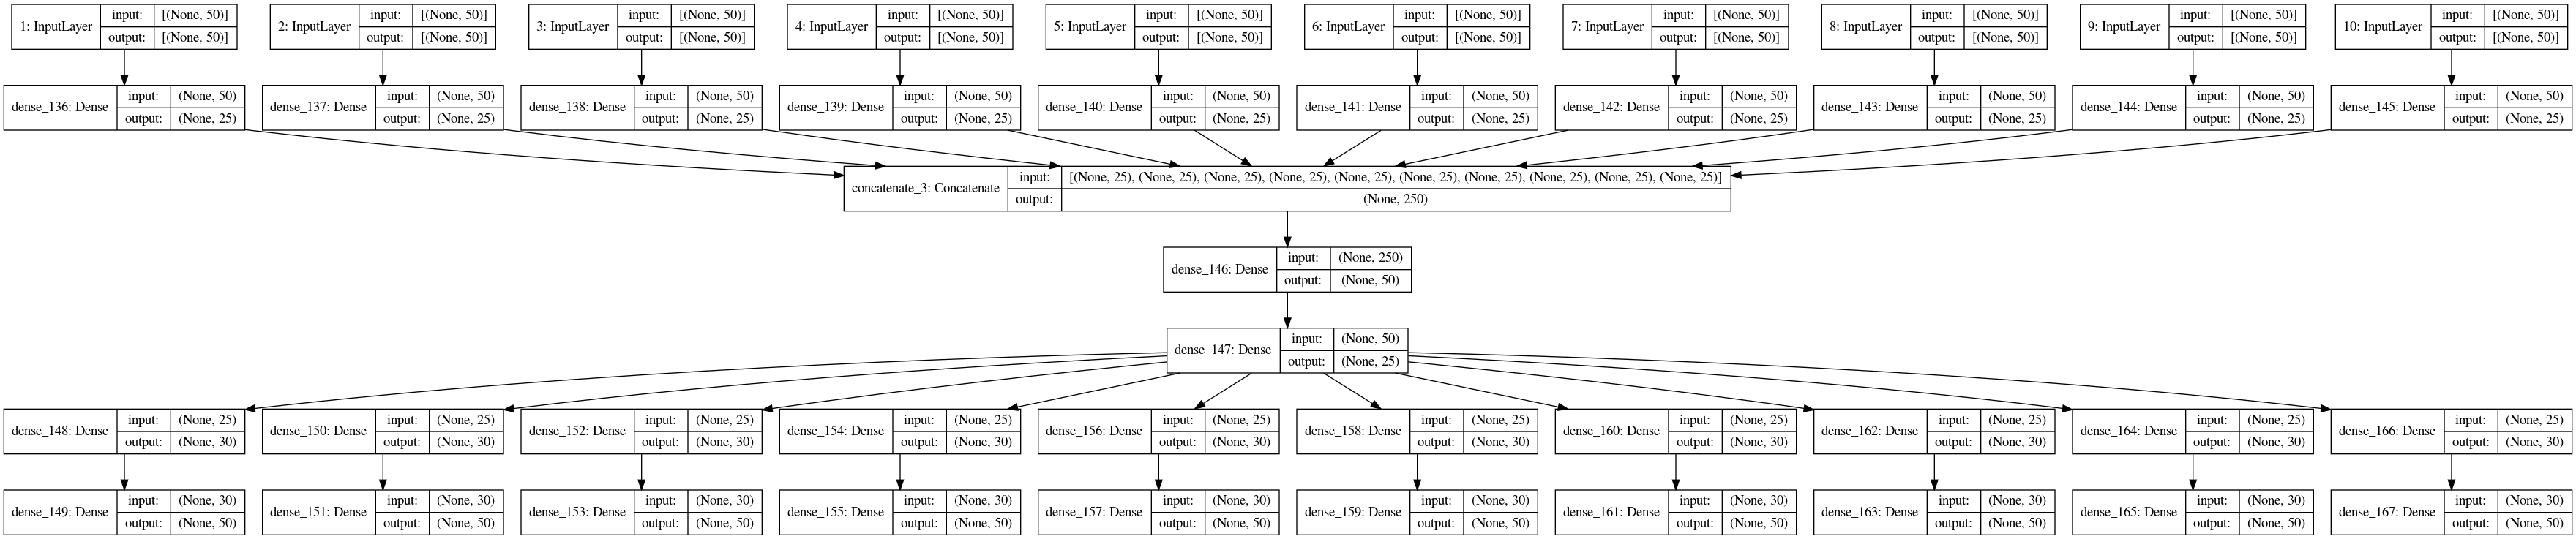

In [40]:
autoencoder_1, encoder_1 = model_1(50)
tf.keras.utils.plot_model(autoencoder_1, to_file="/data1/hcs207019/data/mr/images_new/autoencoder_1.png", show_shapes=True)

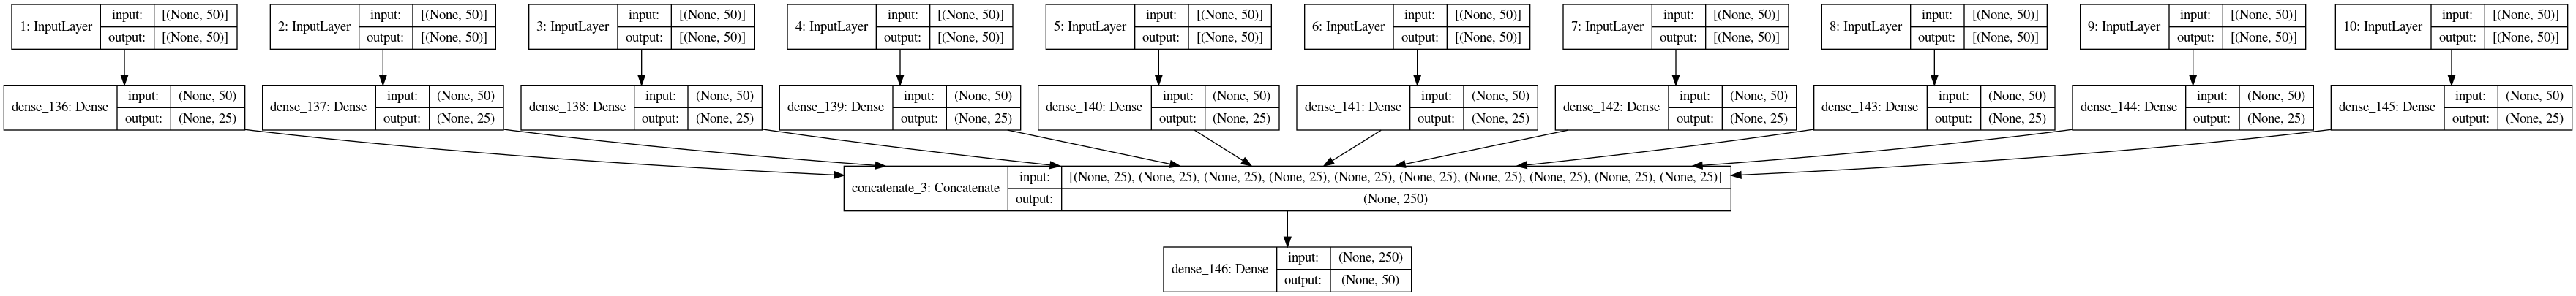

In [41]:
tf.keras.utils.plot_model(encoder_1, to_file="/data1/hcs207019/data/mr/images_new/encoder_1.png", show_shapes=True)

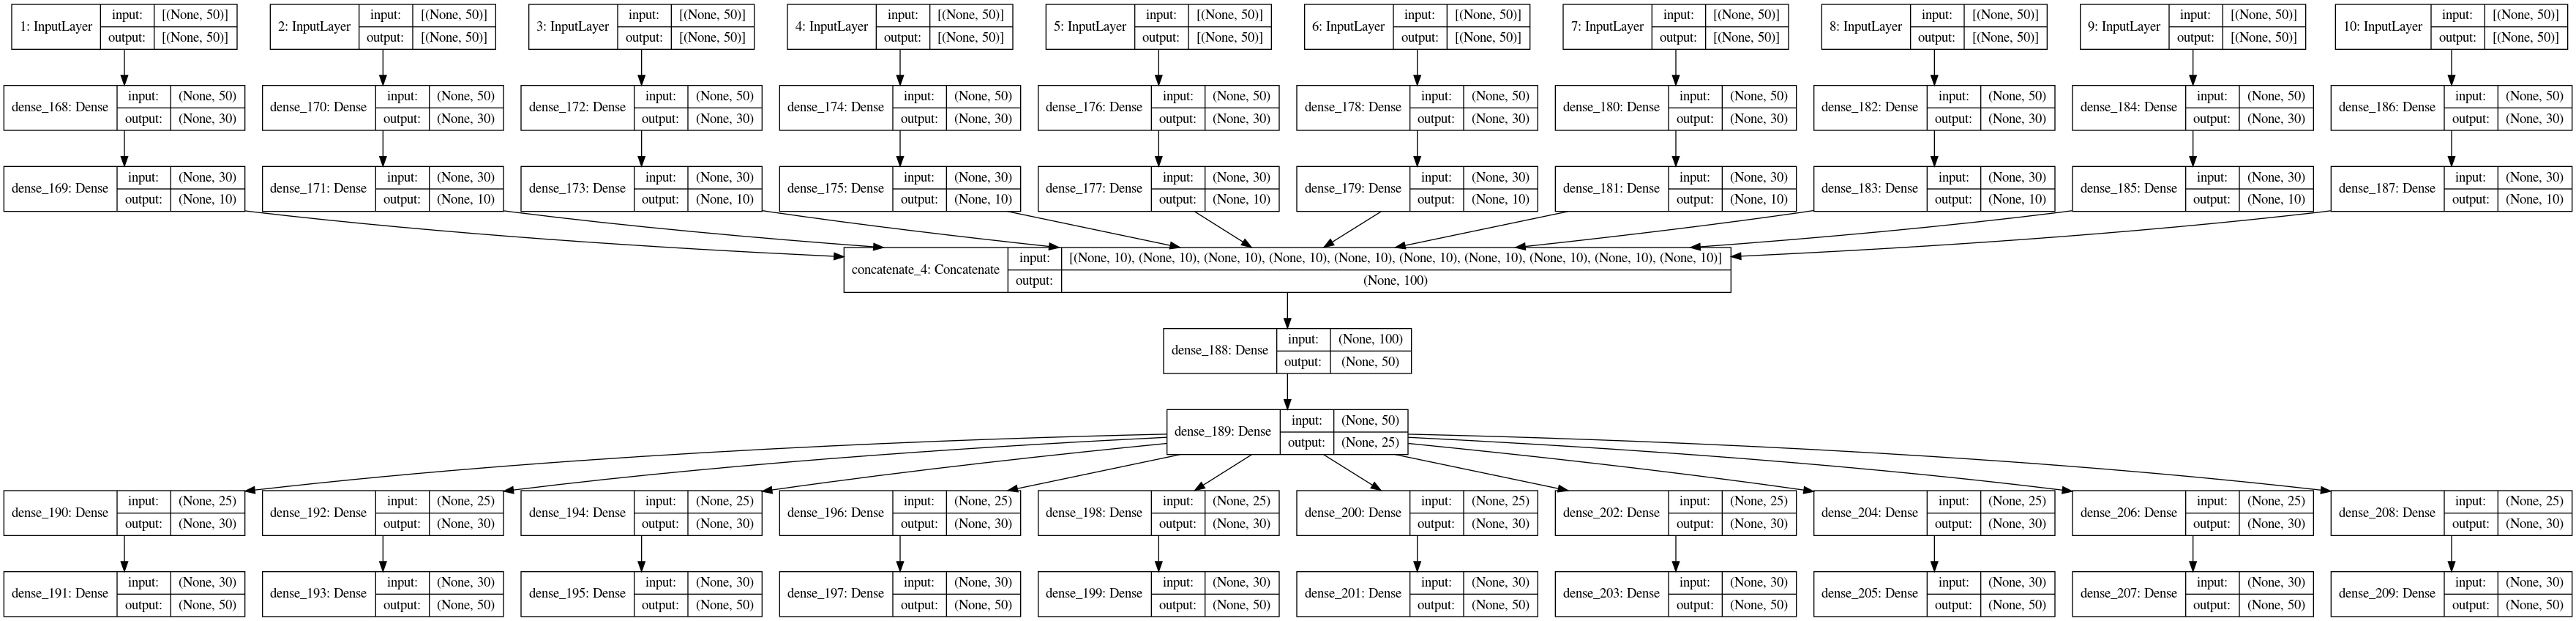

In [42]:
autoencoder_2, encoder_2 = model_2(50)
tf.keras.utils.plot_model(autoencoder_2, to_file="/data1/hcs207019/data/mr/images_new/autoencoder_2.png", show_shapes=True)

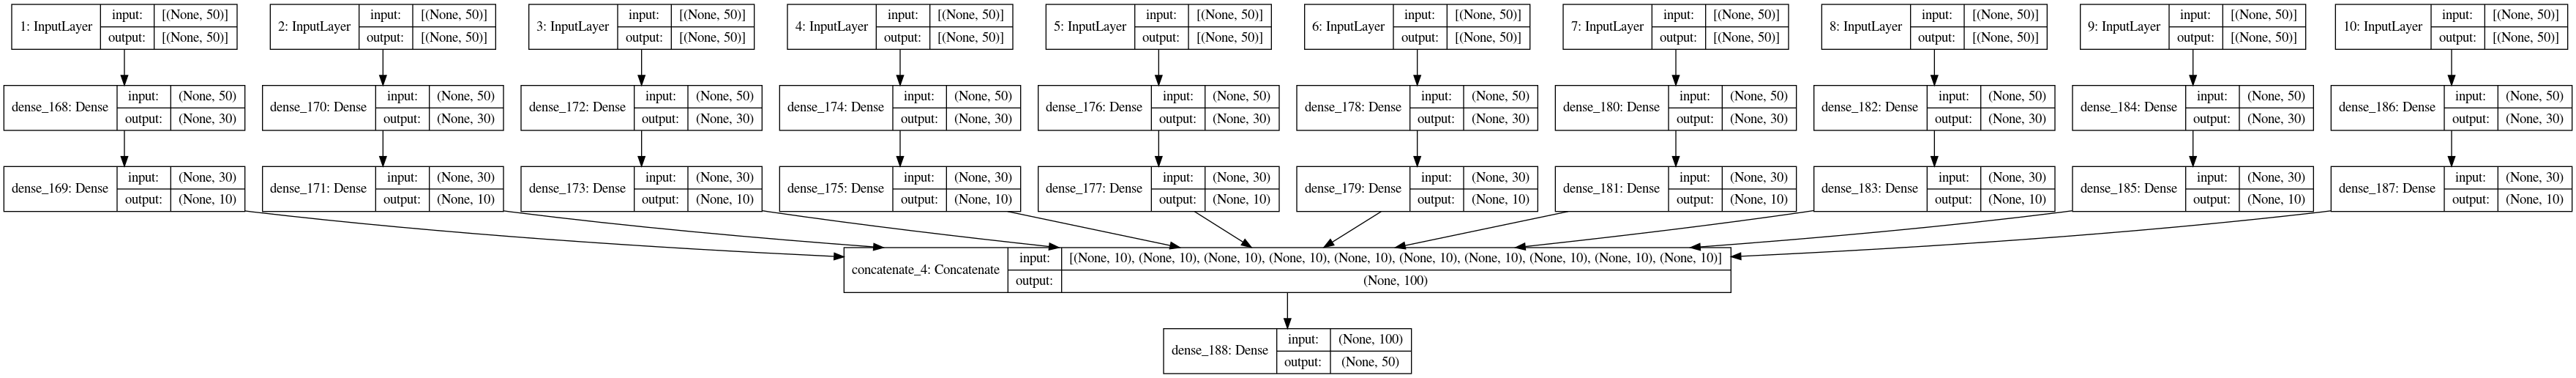

In [43]:
tf.keras.utils.plot_model(encoder_2, to_file="/data1/hcs207019/data/mr/images_new/encoder_2.png", show_shapes=True)

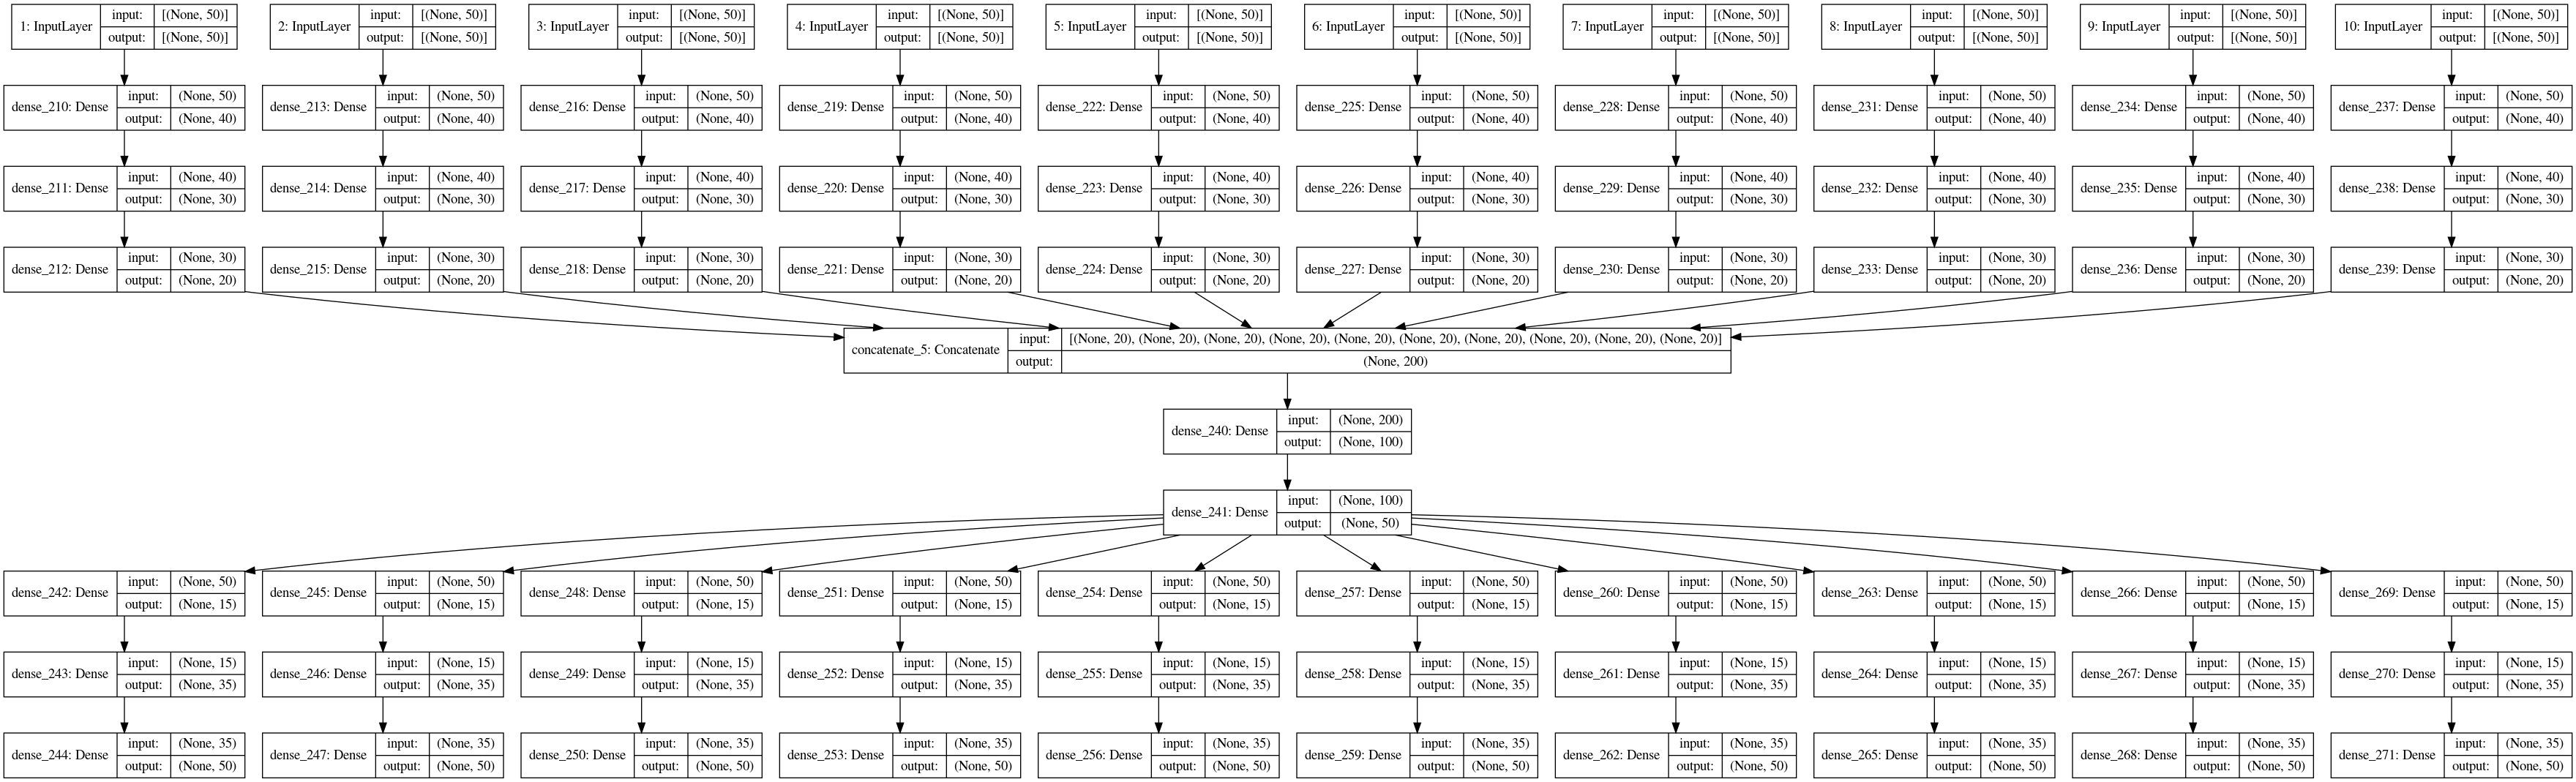

In [44]:
autoencoder_3, encoder_3 = model_3(50)
tf.keras.utils.plot_model(autoencoder_3, to_file="/data1/hcs207019/data/mr/images_new/autoencoder_3.png", show_shapes=True)

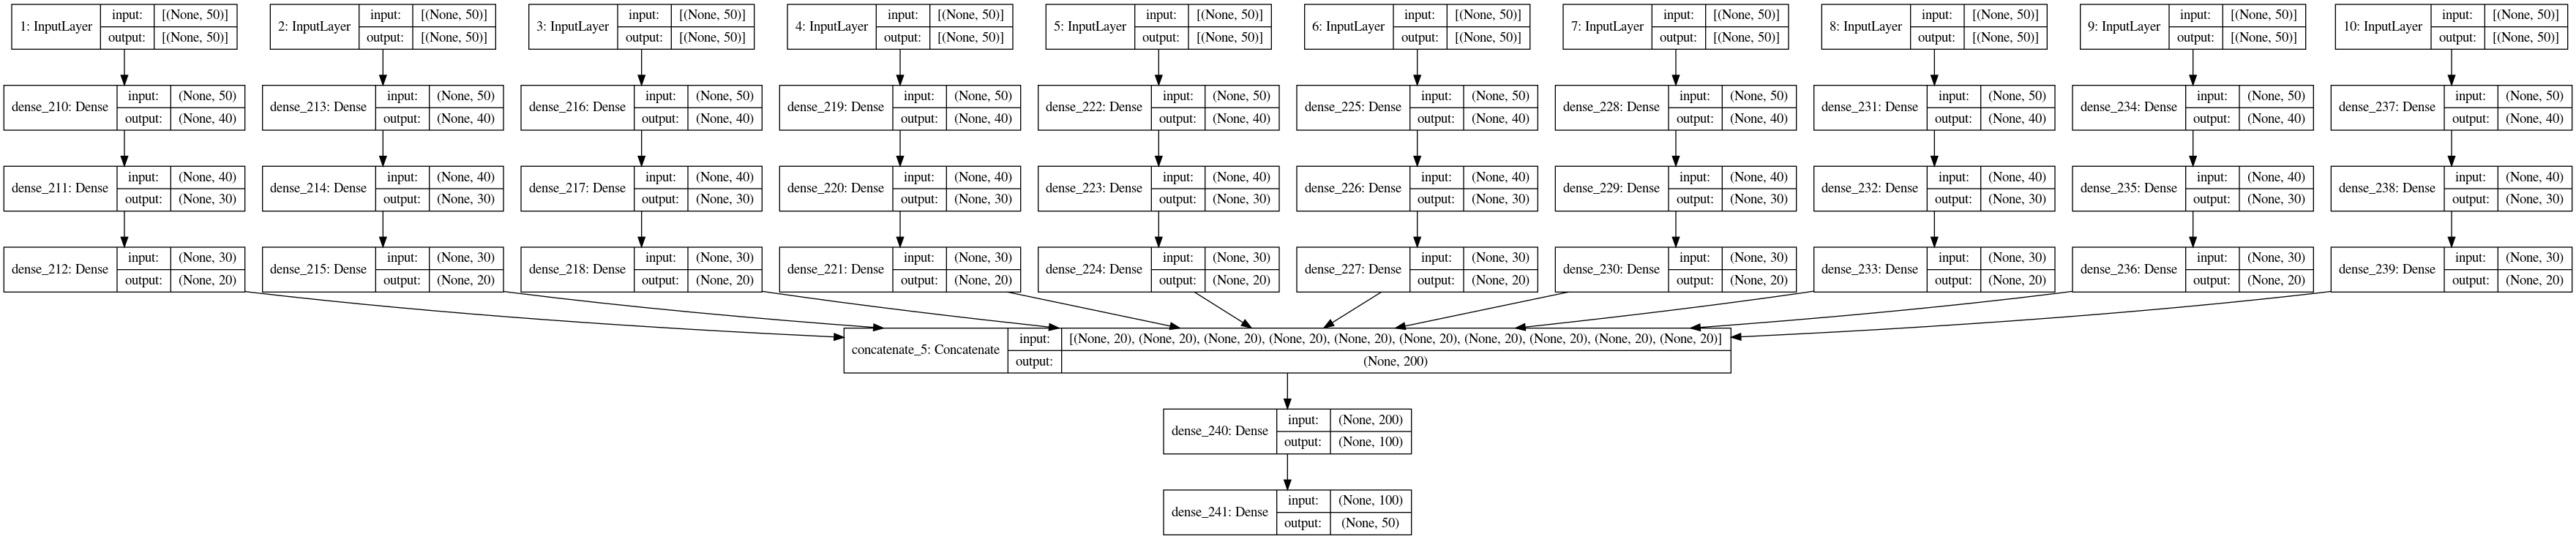

In [45]:
tf.keras.utils.plot_model(encoder_3, to_file="/data1/hcs207019/data/mr/images_new/encoder_3.png", show_shapes=True)

## Train all the autoencoders
- for 100 epochs each

In [47]:
autoencoder_11, encoder_11, encoded_embbs_1 = ensemble_CAEME_adv(W[:], autoencoder_1, encoder_1)

Epoch 1/100
9072/9072 [==============================] - 77s 8ms/step - loss: 1.4390 - dense_149_loss: 0.1458 - dense_151_loss: 0.1431 - dense_153_loss: 0.1351 - dense_155_loss: 0.1498 - dense_157_loss: 0.1515 - dense_159_loss: 0.1467 - dense_161_loss: 0.1391 - dense_163_loss: 0.1406 - dense_165_loss: 0.1585 - dense_167_loss: 0.1275
Epoch 2/100
9072/9072 [==============================] - 73s 8ms/step - loss: 1.4392 - dense_149_loss: 0.1458 - dense_151_loss: 0.1431 - dense_153_loss: 0.1351 - dense_155_loss: 0.1495 - dense_157_loss: 0.1516 - dense_159_loss: 0.1468 - dense_161_loss: 0.1391 - dense_163_loss: 0.1409 - dense_165_loss: 0.1586 - dense_167_loss: 0.1274
Epoch 3/100
9072/9072 [==============================] - 74s 8ms/step - loss: 1.4353 - dense_149_loss: 0.1455 - dense_151_loss: 0.1420 - dense_153_loss: 0.1347 - dense_155_loss: 0.1491 - dense_157_loss: 0.1513 - dense_159_loss: 0.1465 - dense_161_loss: 0.1387 - dense_163_loss: 0.1406 - dense_165_loss: 0.1582 - dense_167_loss: 0.

9072/9072 [==============================] - 74s 8ms/step - loss: 1.4273 - dense_149_loss: 0.1449 - dense_151_loss: 0.1408 - dense_153_loss: 0.1345 - dense_155_loss: 0.1479 - dense_157_loss: 0.1510 - dense_159_loss: 0.1459 - dense_161_loss: 0.1378 - dense_163_loss: 0.1392 - dense_165_loss: 0.1581 - dense_167_loss: 0.1259
Epoch 26/100
9072/9072 [==============================] - 73s 8ms/step - loss: 1.4273 - dense_149_loss: 0.1449 - dense_151_loss: 0.1408 - dense_153_loss: 0.1345 - dense_155_loss: 0.1478 - dense_157_loss: 0.1510 - dense_159_loss: 0.1459 - dense_161_loss: 0.1378 - dense_163_loss: 0.1393 - dense_165_loss: 0.1580 - dense_167_loss: 0.1258
Epoch 27/100
9072/9072 [==============================] - 75s 8ms/step - loss: 1.4239 - dense_149_loss: 0.1446 - dense_151_loss: 0.1404 - dense_153_loss: 0.1341 - dense_155_loss: 0.1475 - dense_157_loss: 0.1507 - dense_159_loss: 0.1456 - dense_161_loss: 0.1374 - dense_163_loss: 0.1389 - dense_165_loss: 0.1577 - dense_167_loss: 0.1255
Epoch

9072/9072 [==============================] - 61s 7ms/step - loss: 1.4236 - dense_149_loss: 0.1446 - dense_151_loss: 0.1405 - dense_153_loss: 0.1339 - dense_155_loss: 0.1476 - dense_157_loss: 0.1506 - dense_159_loss: 0.1455 - dense_161_loss: 0.1375 - dense_163_loss: 0.1388 - dense_165_loss: 0.1577 - dense_167_loss: 0.1252
Epoch 50/100
9072/9072 [==============================] - 62s 7ms/step - loss: 1.4217 - dense_149_loss: 0.1443 - dense_151_loss: 0.1404 - dense_153_loss: 0.1338 - dense_155_loss: 0.1474 - dense_157_loss: 0.1504 - dense_159_loss: 0.1453 - dense_161_loss: 0.1374 - dense_163_loss: 0.1386 - dense_165_loss: 0.1575 - dense_167_loss: 0.1251
Epoch 51/100
9072/9072 [==============================] - 78s 9ms/step - loss: 1.4222 - dense_149_loss: 0.1444 - dense_151_loss: 0.1404 - dense_153_loss: 0.1337 - dense_155_loss: 0.1475 - dense_157_loss: 0.1505 - dense_159_loss: 0.1453 - dense_161_loss: 0.1375 - dense_163_loss: 0.1387 - dense_165_loss: 0.1576 - dense_167_loss: 0.1251
Epoch

9072/9072 [==============================] - 62s 7ms/step - loss: 1.4200 - dense_149_loss: 0.1440 - dense_151_loss: 0.1403 - dense_153_loss: 0.1334 - dense_155_loss: 0.1471 - dense_157_loss: 0.1503 - dense_159_loss: 0.1451 - dense_161_loss: 0.1374 - dense_163_loss: 0.1386 - dense_165_loss: 0.1573 - dense_167_loss: 0.1248
Epoch 74/100
9072/9072 [==============================] - 62s 7ms/step - loss: 1.4217 - dense_149_loss: 0.1442 - dense_151_loss: 0.1406 - dense_153_loss: 0.1336 - dense_155_loss: 0.1472 - dense_157_loss: 0.1505 - dense_159_loss: 0.1453 - dense_161_loss: 0.1376 - dense_163_loss: 0.1388 - dense_165_loss: 0.1575 - dense_167_loss: 0.1250
Epoch 75/100
9072/9072 [==============================] - 58s 6ms/step - loss: 1.4216 - dense_149_loss: 0.1441 - dense_151_loss: 0.1406 - dense_153_loss: 0.1336 - dense_155_loss: 0.1473 - dense_157_loss: 0.1505 - dense_159_loss: 0.1453 - dense_161_loss: 0.1375 - dense_163_loss: 0.1388 - dense_165_loss: 0.1575 - dense_167_loss: 0.1250
Epoch

9072/9072 [==============================] - 61s 7ms/step - loss: 1.4168 - dense_149_loss: 0.1439 - dense_151_loss: 0.1395 - dense_153_loss: 0.1331 - dense_155_loss: 0.1469 - dense_157_loss: 0.1501 - dense_159_loss: 0.1449 - dense_161_loss: 0.1367 - dense_163_loss: 0.1384 - dense_165_loss: 0.1573 - dense_167_loss: 0.1246
Epoch 98/100
9072/9072 [==============================] - 62s 7ms/step - loss: 1.4203 - dense_149_loss: 0.1442 - dense_151_loss: 0.1398 - dense_153_loss: 0.1334 - dense_155_loss: 0.1472 - dense_157_loss: 0.1505 - dense_159_loss: 0.1451 - dense_161_loss: 0.1371 - dense_163_loss: 0.1387 - dense_165_loss: 0.1576 - dense_167_loss: 0.1249
Epoch 99/100
9072/9072 [==============================] - 61s 7ms/step - loss: 1.4182 - dense_149_loss: 0.1440 - dense_151_loss: 0.1396 - dense_153_loss: 0.1333 - dense_155_loss: 0.1470 - dense_157_loss: 0.1503 - dense_159_loss: 0.1449 - dense_161_loss: 0.1369 - dense_163_loss: 0.1386 - dense_165_loss: 0.1574 - dense_167_loss: 0.1247
Epoch

#### Save models and the Meta embeddings

In [48]:
np.savetxt('/data1/hcs207019/data/mr/embb_new/embbs_1.txt', encoded_embbs_1)

In [49]:
np.save('/data1/hcs207019/data/mr/embb_new/embbs_1', encoded_embbs_1)

In [50]:
autoencoder_11.save('/data1/hcs207019/data/mr/models_new/autoencoder_1')
encoder_11.save('/data1/hcs207019/data/mr/models_new/encoder_1')

INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/autoencoder_1/assets
INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/encoder_1/assets


In [51]:
data_path ='/data1/hcs207019/data/mr/processed/proc_Marathi-WS.txt'

#### FInd correlation score

In [52]:
dataset, corr, oov = custom_compute_similarity(data_path, encoded_embbs_1, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt : 16  (OOV:  1%)


In [53]:
autoencoder_21, encoder_21, encoded_embbs_2 = ensemble_CAEME_adv(W[:], autoencoder_2, encoder_2)

Epoch 1/100
9072/9072 [==============================] - 75s 8ms/step - loss: 1.5379 - dense_191_loss: 0.1535 - dense_193_loss: 0.1488 - dense_195_loss: 0.1447 - dense_197_loss: 0.1605 - dense_199_loss: 0.1604 - dense_201_loss: 0.1583 - dense_203_loss: 0.1453 - dense_205_loss: 0.1527 - dense_207_loss: 0.1657 - dense_209_loss: 0.1415
Epoch 2/100
9072/9072 [==============================] - 68s 7ms/step - loss: 1.4457 - dense_191_loss: 0.1450 - dense_193_loss: 0.1398 - dense_195_loss: 0.1345 - dense_197_loss: 0.1537 - dense_199_loss: 0.1529 - dense_201_loss: 0.1477 - dense_203_loss: 0.1348 - dense_205_loss: 0.1438 - dense_207_loss: 0.1598 - dense_209_loss: 0.1312
Epoch 3/100
9072/9072 [==============================] - 66s 7ms/step - loss: 1.4394 - dense_191_loss: 0.1443 - dense_193_loss: 0.1391 - dense_195_loss: 0.1337 - dense_197_loss: 0.1535 - dense_199_loss: 0.1524 - dense_201_loss: 0.1473 - dense_203_loss: 0.1339 - dense_205_loss: 0.1429 - dense_207_loss: 0.1595 - dense_209_loss: 0.

9072/9072 [==============================] - 64s 7ms/step - loss: 1.4051 - dense_191_loss: 0.1426 - dense_193_loss: 0.1337 - dense_195_loss: 0.1304 - dense_197_loss: 0.1471 - dense_199_loss: 0.1497 - dense_201_loss: 0.1433 - dense_203_loss: 0.1314 - dense_205_loss: 0.1396 - dense_207_loss: 0.1575 - dense_209_loss: 0.1279
Epoch 26/100
9072/9072 [==============================] - 67s 7ms/step - loss: 1.4037 - dense_191_loss: 0.1423 - dense_193_loss: 0.1337 - dense_195_loss: 0.1303 - dense_197_loss: 0.1469 - dense_199_loss: 0.1495 - dense_201_loss: 0.1432 - dense_203_loss: 0.1313 - dense_205_loss: 0.1396 - dense_207_loss: 0.1575 - dense_209_loss: 0.1277
Epoch 27/100
9072/9072 [==============================] - 66s 7ms/step - loss: 1.4044 - dense_191_loss: 0.1424 - dense_193_loss: 0.1338 - dense_195_loss: 0.1304 - dense_197_loss: 0.1469 - dense_199_loss: 0.1496 - dense_201_loss: 0.1434 - dense_203_loss: 0.1313 - dense_205_loss: 0.1396 - dense_207_loss: 0.1576 - dense_209_loss: 0.1277
Epoch

9072/9072 [==============================] - 66s 7ms/step - loss: 1.4036 - dense_191_loss: 0.1420 - dense_193_loss: 0.1338 - dense_195_loss: 0.1305 - dense_197_loss: 0.1466 - dense_199_loss: 0.1496 - dense_201_loss: 0.1433 - dense_203_loss: 0.1316 - dense_205_loss: 0.1396 - dense_207_loss: 0.1576 - dense_209_loss: 0.1273
Epoch 50/100
9072/9072 [==============================] - 68s 7ms/step - loss: 1.4054 - dense_191_loss: 0.1423 - dense_193_loss: 0.1340 - dense_195_loss: 0.1306 - dense_197_loss: 0.1468 - dense_199_loss: 0.1498 - dense_201_loss: 0.1434 - dense_203_loss: 0.1318 - dense_205_loss: 0.1397 - dense_207_loss: 0.1578 - dense_209_loss: 0.1275
Epoch 51/100
9072/9072 [==============================] - 66s 7ms/step - loss: 1.4058 - dense_191_loss: 0.1423 - dense_193_loss: 0.1340 - dense_195_loss: 0.1306 - dense_197_loss: 0.1469 - dense_199_loss: 0.1498 - dense_201_loss: 0.1435 - dense_203_loss: 0.1318 - dense_205_loss: 0.1398 - dense_207_loss: 0.1578 - dense_209_loss: 0.1275
Epoch

9072/9072 [==============================] - 66s 7ms/step - loss: 1.4089 - dense_191_loss: 0.1431 - dense_193_loss: 0.1342 - dense_195_loss: 0.1310 - dense_197_loss: 0.1470 - dense_199_loss: 0.1500 - dense_201_loss: 0.1437 - dense_203_loss: 0.1322 - dense_205_loss: 0.1402 - dense_207_loss: 0.1576 - dense_209_loss: 0.1278
Epoch 74/100
9072/9072 [==============================] - 67s 7ms/step - loss: 1.4080 - dense_191_loss: 0.1430 - dense_193_loss: 0.1341 - dense_195_loss: 0.1309 - dense_197_loss: 0.1470 - dense_199_loss: 0.1499 - dense_201_loss: 0.1436 - dense_203_loss: 0.1321 - dense_205_loss: 0.1402 - dense_207_loss: 0.1575 - dense_209_loss: 0.1277
Epoch 75/100
9072/9072 [==============================] - 67s 7ms/step - loss: 1.4074 - dense_191_loss: 0.1428 - dense_193_loss: 0.1340 - dense_195_loss: 0.1309 - dense_197_loss: 0.1469 - dense_199_loss: 0.1499 - dense_201_loss: 0.1436 - dense_203_loss: 0.1321 - dense_205_loss: 0.1401 - dense_207_loss: 0.1575 - dense_209_loss: 0.1277
Epoch

9072/9072 [==============================] - 67s 7ms/step - loss: 1.4069 - dense_191_loss: 0.1428 - dense_193_loss: 0.1339 - dense_195_loss: 0.1307 - dense_197_loss: 0.1469 - dense_199_loss: 0.1497 - dense_201_loss: 0.1434 - dense_203_loss: 0.1321 - dense_205_loss: 0.1402 - dense_207_loss: 0.1575 - dense_209_loss: 0.1277
Epoch 98/100
9072/9072 [==============================] - 68s 7ms/step - loss: 1.4081 - dense_191_loss: 0.1430 - dense_193_loss: 0.1340 - dense_195_loss: 0.1309 - dense_197_loss: 0.1470 - dense_199_loss: 0.1498 - dense_201_loss: 0.1436 - dense_203_loss: 0.1322 - dense_205_loss: 0.1402 - dense_207_loss: 0.1575 - dense_209_loss: 0.1279
Epoch 99/100
9072/9072 [==============================] - 67s 7ms/step - loss: 1.4063 - dense_191_loss: 0.1429 - dense_193_loss: 0.1338 - dense_195_loss: 0.1307 - dense_197_loss: 0.1469 - dense_199_loss: 0.1497 - dense_201_loss: 0.1433 - dense_203_loss: 0.1319 - dense_205_loss: 0.1400 - dense_207_loss: 0.1574 - dense_209_loss: 0.1276
Epoch

In [54]:
np.savetxt('/data1/hcs207019/data/mr/embb_new/embbs_2.txt', encoded_embbs_2)

In [55]:
np.save('/data1/hcs207019/data/mr/embb_new/embbs_2', encoded_embbs_2)

In [56]:
autoencoder_21.save('/data1/hcs207019/data/mr/models_new/autoencoder_2')
encoder_21.save('/data1/hcs207019/data/mr/models_new/encoder_2')

INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/autoencoder_2/assets
INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/encoder_2/assets


In [57]:
dataset, corr, oov = custom_compute_similarity(data_path, encoded_embbs_2, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt :  5  (OOV:  1%)


In [58]:
autoencoder_31, encoder_31, encoded_embbs_3 = ensemble_CAEME_adv(W[:], autoencoder_3, encoder_3)

Epoch 1/100
9072/9072 [==============================] - 101s 10ms/step - loss: 1.5458 - dense_244_loss: 0.1587 - dense_247_loss: 0.1473 - dense_250_loss: 0.1467 - dense_253_loss: 0.1625 - dense_256_loss: 0.1612 - dense_259_loss: 0.1510 - dense_262_loss: 0.1486 - dense_265_loss: 0.1504 - dense_268_loss: 0.1689 - dense_271_loss: 0.1424
Epoch 2/100
9072/9072 [==============================] - 94s 10ms/step - loss: 1.4430 - dense_244_loss: 0.1500 - dense_247_loss: 0.1375 - dense_250_loss: 0.1359 - dense_253_loss: 0.1533 - dense_256_loss: 0.1527 - dense_259_loss: 0.1405 - dense_262_loss: 0.1377 - dense_265_loss: 0.1407 - dense_268_loss: 0.1589 - dense_271_loss: 0.1325
Epoch 3/100
9072/9072 [==============================] - 94s 10ms/step - loss: 1.4319 - dense_244_loss: 0.1495 - dense_247_loss: 0.1367 - dense_250_loss: 0.1347 - dense_253_loss: 0.1524 - dense_256_loss: 0.1520 - dense_259_loss: 0.1395 - dense_262_loss: 0.1363 - dense_265_loss: 0.1393 - dense_268_loss: 0.1571 - dense_271_loss

9072/9072 [==============================] - 92s 10ms/step - loss: 1.4067 - dense_244_loss: 0.1463 - dense_247_loss: 0.1347 - dense_250_loss: 0.1313 - dense_253_loss: 0.1502 - dense_256_loss: 0.1498 - dense_259_loss: 0.1378 - dense_262_loss: 0.1341 - dense_265_loss: 0.1370 - dense_268_loss: 0.1551 - dense_271_loss: 0.1281
Epoch 26/100
9072/9072 [==============================] - 94s 10ms/step - loss: 1.4065 - dense_244_loss: 0.1463 - dense_247_loss: 0.1347 - dense_250_loss: 0.1312 - dense_253_loss: 0.1501 - dense_256_loss: 0.1498 - dense_259_loss: 0.1378 - dense_262_loss: 0.1341 - dense_265_loss: 0.1370 - dense_268_loss: 0.1551 - dense_271_loss: 0.1281
Epoch 27/100
9072/9072 [==============================] - 93s 10ms/step - loss: 1.4071 - dense_244_loss: 0.1464 - dense_247_loss: 0.1348 - dense_250_loss: 0.1312 - dense_253_loss: 0.1502 - dense_256_loss: 0.1499 - dense_259_loss: 0.1378 - dense_262_loss: 0.1342 - dense_265_loss: 0.1370 - dense_268_loss: 0.1551 - dense_271_loss: 0.1281
Ep

9072/9072 [==============================] - 113s 12ms/step - loss: 1.3979 - dense_244_loss: 0.1447 - dense_247_loss: 0.1346 - dense_250_loss: 0.1311 - dense_253_loss: 0.1486 - dense_256_loss: 0.1498 - dense_259_loss: 0.1368 - dense_262_loss: 0.1341 - dense_265_loss: 0.1371 - dense_268_loss: 0.1550 - dense_271_loss: 0.1236
Epoch 50/100
9072/9072 [==============================] - 109s 12ms/step - loss: 1.3962 - dense_244_loss: 0.1446 - dense_247_loss: 0.1344 - dense_250_loss: 0.1310 - dense_253_loss: 0.1484 - dense_256_loss: 0.1497 - dense_259_loss: 0.1367 - dense_262_loss: 0.1338 - dense_265_loss: 0.1370 - dense_268_loss: 0.1549 - dense_271_loss: 0.1234
Epoch 51/100
9072/9072 [==============================] - 110s 12ms/step - loss: 1.3948 - dense_244_loss: 0.1444 - dense_247_loss: 0.1343 - dense_250_loss: 0.1309 - dense_253_loss: 0.1482 - dense_256_loss: 0.1495 - dense_259_loss: 0.1366 - dense_262_loss: 0.1337 - dense_265_loss: 0.1369 - dense_268_loss: 0.1547 - dense_271_loss: 0.1233

9072/9072 [==============================] - 110s 12ms/step - loss: 1.3908 - dense_244_loss: 0.1443 - dense_247_loss: 0.1317 - dense_250_loss: 0.1308 - dense_253_loss: 0.1480 - dense_256_loss: 0.1491 - dense_259_loss: 0.1366 - dense_262_loss: 0.1335 - dense_265_loss: 0.1368 - dense_268_loss: 0.1547 - dense_271_loss: 0.1231
Epoch 74/100
9072/9072 [==============================] - 109s 12ms/step - loss: 1.3907 - dense_244_loss: 0.1443 - dense_247_loss: 0.1316 - dense_250_loss: 0.1307 - dense_253_loss: 0.1480 - dense_256_loss: 0.1491 - dense_259_loss: 0.1366 - dense_262_loss: 0.1334 - dense_265_loss: 0.1368 - dense_268_loss: 0.1547 - dense_271_loss: 0.1230
Epoch 75/100
9072/9072 [==============================] - 99s 11ms/step - loss: 1.3917 - dense_244_loss: 0.1444 - dense_247_loss: 0.1317 - dense_250_loss: 0.1308 - dense_253_loss: 0.1481 - dense_256_loss: 0.1492 - dense_259_loss: 0.1366 - dense_262_loss: 0.1336 - dense_265_loss: 0.1370 - dense_268_loss: 0.1548 - dense_271_loss: 0.1231


9072/9072 [==============================] - 91s 10ms/step - loss: 1.3900 - dense_244_loss: 0.1443 - dense_247_loss: 0.1313 - dense_250_loss: 0.1307 - dense_253_loss: 0.1480 - dense_256_loss: 0.1490 - dense_259_loss: 0.1361 - dense_262_loss: 0.1335 - dense_265_loss: 0.1369 - dense_268_loss: 0.1547 - dense_271_loss: 0.1230
Epoch 98/100
9072/9072 [==============================] - 85s 9ms/step - loss: 1.3893 - dense_244_loss: 0.1442 - dense_247_loss: 0.1312 - dense_250_loss: 0.1306 - dense_253_loss: 0.1480 - dense_256_loss: 0.1490 - dense_259_loss: 0.1361 - dense_262_loss: 0.1335 - dense_265_loss: 0.1368 - dense_268_loss: 0.1547 - dense_271_loss: 0.1229
Epoch 99/100
9072/9072 [==============================] - 85s 9ms/step - loss: 1.3897 - dense_244_loss: 0.1443 - dense_247_loss: 0.1312 - dense_250_loss: 0.1307 - dense_253_loss: 0.1480 - dense_256_loss: 0.1490 - dense_259_loss: 0.1361 - dense_262_loss: 0.1335 - dense_265_loss: 0.1369 - dense_268_loss: 0.1548 - dense_271_loss: 0.1229
Epoc

In [59]:
np.savetxt('/data1/hcs207019/data/mr/embb_new/embbs_3.txt', encoded_embbs_3)

In [60]:
np.save('/data1/hcs207019/data/mr/embb_new/embbs_3', encoded_embbs_3)

In [61]:
autoencoder_31.save('/data1/hcs207019/data/mr/models_new/autoencoder_3')
encoder_31.save('/data1/hcs207019/data/mr/models_new/encoder_3')

INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/autoencoder_3/assets
INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/encoder_3/assets


In [62]:
dataset, corr, oov = custom_compute_similarity(data_path, encoded_embbs_3, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt : 37  (OOV:  1%)


## AAEME model
- model_4 is AAEME

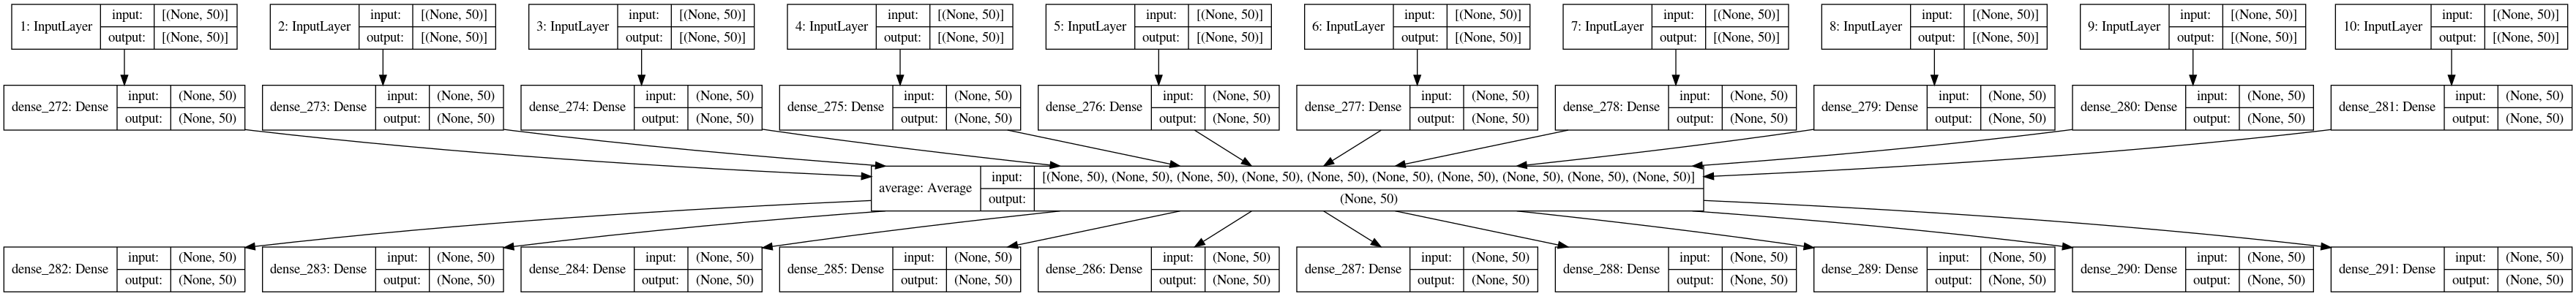

In [80]:
from model_4 import model_4
autoencoder_4, encoder_4 = model_4(50)
tf.keras.utils.plot_model(autoencoder_4, to_file="/data1/hcs207019/data/mr/images_new/autoencoder_4.png", show_shapes=True)

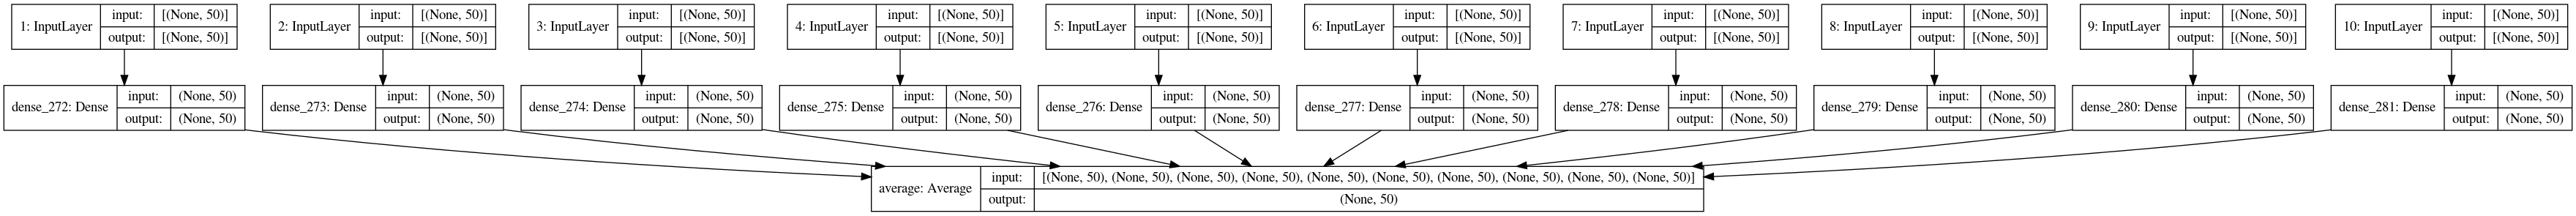

In [81]:
tf.keras.utils.plot_model(encoder_4, to_file="/data1/hcs207019/data/mr/images_new/encoder_4.png", show_shapes=True)

In [82]:
autoencoder_41, encoder_41, encoded_embbs_4 = ensemble_CAEME_adv(W[:], autoencoder_4, encoder_4)

Epoch 1/100
9072/9072 [==============================] - 69s 7ms/step - loss: 1.3722 - dense_282_loss: 0.1440 - dense_283_loss: 0.1280 - dense_284_loss: 0.1223 - dense_285_loss: 0.1461 - dense_286_loss: 0.1387 - dense_287_loss: 0.1409 - dense_288_loss: 0.1248 - dense_289_loss: 0.1324 - dense_290_loss: 0.1586 - dense_291_loss: 0.1165
Epoch 2/100
9072/9072 [==============================] - 65s 7ms/step - loss: 1.2403 - dense_282_loss: 0.1298 - dense_283_loss: 0.1167 - dense_284_loss: 0.1101 - dense_285_loss: 0.1313 - dense_286_loss: 0.1272 - dense_287_loss: 0.1286 - dense_288_loss: 0.1131 - dense_289_loss: 0.1198 - dense_290_loss: 0.1493 - dense_291_loss: 0.1024
Epoch 3/100
9072/9072 [==============================] - 57s 6ms/step - loss: 1.2341 - dense_282_loss: 0.1296 - dense_283_loss: 0.1165 - dense_284_loss: 0.1100 - dense_285_loss: 0.1311 - dense_286_loss: 0.1270 - dense_287_loss: 0.1279 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1480 - dense_291_loss: 0.

9072/9072 [==============================] - 49s 5ms/step - loss: 1.2279 - dense_282_loss: 0.1296 - dense_283_loss: 0.1165 - dense_284_loss: 0.1099 - dense_285_loss: 0.1311 - dense_286_loss: 0.1270 - dense_287_loss: 0.1278 - dense_288_loss: 0.1128 - dense_289_loss: 0.1196 - dense_290_loss: 0.1481 - dense_291_loss: 0.1021
Epoch 26/100
9072/9072 [==============================] - 50s 6ms/step - loss: 1.2283 - dense_282_loss: 0.1297 - dense_283_loss: 0.1166 - dense_284_loss: 0.1099 - dense_285_loss: 0.1311 - dense_286_loss: 0.1270 - dense_287_loss: 0.1279 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1482 - dense_291_loss: 0.1022
Epoch 27/100
9072/9072 [==============================] - 49s 5ms/step - loss: 1.2277 - dense_282_loss: 0.1296 - dense_283_loss: 0.1165 - dense_284_loss: 0.1099 - dense_285_loss: 0.1310 - dense_286_loss: 0.1270 - dense_287_loss: 0.1278 - dense_288_loss: 0.1128 - dense_289_loss: 0.1196 - dense_290_loss: 0.1481 - dense_291_loss: 0.1021
Epoch

9072/9072 [==============================] - 51s 6ms/step - loss: 1.2275 - dense_282_loss: 0.1297 - dense_283_loss: 0.1165 - dense_284_loss: 0.1099 - dense_285_loss: 0.1311 - dense_286_loss: 0.1270 - dense_287_loss: 0.1278 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1481 - dense_291_loss: 0.1021
Epoch 50/100
9072/9072 [==============================] - 49s 5ms/step - loss: 1.2294 - dense_282_loss: 0.1299 - dense_283_loss: 0.1167 - dense_284_loss: 0.1100 - dense_285_loss: 0.1314 - dense_286_loss: 0.1271 - dense_287_loss: 0.1280 - dense_288_loss: 0.1130 - dense_289_loss: 0.1198 - dense_290_loss: 0.1484 - dense_291_loss: 0.1023
Epoch 51/100
9072/9072 [==============================] - 50s 6ms/step - loss: 1.2274 - dense_282_loss: 0.1296 - dense_283_loss: 0.1165 - dense_284_loss: 0.1099 - dense_285_loss: 0.1311 - dense_286_loss: 0.1270 - dense_287_loss: 0.1279 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1481 - dense_291_loss: 0.1021
Epoch

9072/9072 [==============================] - 67s 7ms/step - loss: 1.2268 - dense_282_loss: 0.1296 - dense_283_loss: 0.1165 - dense_284_loss: 0.1098 - dense_285_loss: 0.1311 - dense_286_loss: 0.1270 - dense_287_loss: 0.1279 - dense_288_loss: 0.1128 - dense_289_loss: 0.1195 - dense_290_loss: 0.1481 - dense_291_loss: 0.1021
Epoch 74/100
9072/9072 [==============================] - 68s 7ms/step - loss: 1.2278 - dense_282_loss: 0.1297 - dense_283_loss: 0.1166 - dense_284_loss: 0.1099 - dense_285_loss: 0.1312 - dense_286_loss: 0.1271 - dense_287_loss: 0.1279 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1482 - dense_291_loss: 0.1021
Epoch 75/100
9072/9072 [==============================] - 69s 8ms/step - loss: 1.2280 - dense_282_loss: 0.1297 - dense_283_loss: 0.1166 - dense_284_loss: 0.1099 - dense_285_loss: 0.1312 - dense_286_loss: 0.1271 - dense_287_loss: 0.1280 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1482 - dense_291_loss: 0.1022
Epoch

9072/9072 [==============================] - 58s 6ms/step - loss: 1.2285 - dense_282_loss: 0.1299 - dense_283_loss: 0.1167 - dense_284_loss: 0.1100 - dense_285_loss: 0.1312 - dense_286_loss: 0.1272 - dense_287_loss: 0.1281 - dense_288_loss: 0.1130 - dense_289_loss: 0.1198 - dense_290_loss: 0.1483 - dense_291_loss: 0.1022
Epoch 98/100
9072/9072 [==============================] - 59s 6ms/step - loss: 1.2276 - dense_282_loss: 0.1298 - dense_283_loss: 0.1166 - dense_284_loss: 0.1099 - dense_285_loss: 0.1311 - dense_286_loss: 0.1271 - dense_287_loss: 0.1280 - dense_288_loss: 0.1129 - dense_289_loss: 0.1196 - dense_290_loss: 0.1482 - dense_291_loss: 0.1021
Epoch 99/100
9072/9072 [==============================] - 58s 6ms/step - loss: 1.2282 - dense_282_loss: 0.1298 - dense_283_loss: 0.1166 - dense_284_loss: 0.1099 - dense_285_loss: 0.1312 - dense_286_loss: 0.1272 - dense_287_loss: 0.1280 - dense_288_loss: 0.1130 - dense_289_loss: 0.1197 - dense_290_loss: 0.1483 - dense_291_loss: 0.1021
Epoch

In [83]:
np.savetxt('/data1/hcs207019/data/mr/embb_new/embbs_4.txt', encoded_embbs_4)

In [84]:
np.save('/data1/hcs207019/data/mr/embb_new/embbs_4', encoded_embbs_4)

In [85]:
autoencoder_41.save('/data1/hcs207019/data/mr/models_new/autoencoder_4')
encoder_41.save('/data1/hcs207019/data/mr/models_new/encoder_4')

INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/autoencoder_4/assets
INFO:tensorflow:Assets written to: /data1/hcs207019/data/mr/models_new/encoder_4/assets


In [86]:
dataset, corr, oov = custom_compute_similarity(data_path, encoded_embbs_4, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt : 49  (OOV:  1%)


# Models trained for longer
- embbs_1 is model_3 trained for 500 epochs
- embbs_2 is model_3 trained for 700 epochs
- embbs_3 is model_3 trained for 900 epochs

In [75]:
embbs_1 = np.load('/data1/hcs207019/data/mr/embb/embb1.npy')
embbs_2 = np.load('/data1/hcs207019/data/mr/embb/embb2.npy')
embbs_3 = np.load('/data1/hcs207019/data/mr/embb/embb3.npy')

In [76]:
dataset, corr, oov = custom_compute_similarity(data_path, embbs_1, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt : 42  (OOV:  1%)


In [77]:
dataset, corr, oov = custom_compute_similarity(data_path, embbs_2, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt : 43  (OOV:  1%)


In [78]:
dataset, corr, oov = custom_compute_similarity(data_path, embbs_3, words)
print("{0:20s}: {1:2.0f}  (OOV: {2:2.0f}%)".format(dataset, corr, oov))

proc_Marathi-WS.txt : 39  (OOV:  1%)
